In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

%run graphing_function_recent.ipynb

In [2]:
#Use this for all adjustable values 
#input file paths here (include .csv):
video_path = r'\\10.25.16.5\yaochen\Active\DLC\Final_Models\Lindsey\escape_behavior_2-lindsey_christinger-2024-06-13_v1\D1D2\coords_csv\CoordM6_07-17-24_control_P2_videoDLC_resnet50_escape_behavior_2Jun13shuffle1_1030000_filtered_day.csv'
time_path = r'\\10.25.16.5\yaochen\Active\Hanna\Escape_behavior\round2_HannaEscapeBehavior\videoTimestamp\M6_07-17-24_control_P2_videoTimestamp0.csv'
audio_path = r'\\10.25.16.5\yaochen\Active\Hanna\Escape_behavior\round2_HannaEscapeBehavior\stimulusTimestamp\M6_07-17-24_control_P2_stimulusTimestamp0.csv'

north_pixel = 126
south_pixel = 445
east_pixel = 485
west_pixel = 143
shelter_x_pixel = 458
shelter_y_pixel = 302

#estimate for when mouse reaches shelter
escape_done = 7 #time mouse reaches shelter location

In [3]:
#manually decide?
escape_response = True
freezing_response = False
##small_angle = 

In [4]:
sigma = 2

In [5]:
#read in DLC data, convert to cm, center platform at 0,0
#return converted coordinates for all 
shelter_x, shelter_y, x_diam, y_diam, coords = single_mouse_data(north_pixel, south_pixel, east_pixel, west_pixel, shelter_x_pixel, shelter_y_pixel, video_path)

In [6]:
#replace any head, nose, or center points with likelihood < .9 with NA
#coords dataframe is filled with NA when LT<.9, coords_scaled has interpolated data (compare in graphs)
coord_scaled = filter_data(.9, coords)

In [7]:
#add time in seconds for both coords (na values) and coord_scaled (interpolated)
#results in given dataframe with time in seconds zeroed at stimulus onset. choose which stimulus to look at
convert_time(time_path, coord_scaled, audio_path, 1)
convert_time(time_path, coords, audio_path, 1)

In [8]:
#calculate displacement as 'displacement'
displacement(shelter_x, shelter_y, coord_scaled)
displacement(shelter_x, shelter_y, coords)

In [9]:
#calculate speed as 'speed' and change in displacement as 'delta_vector'
#return total distance for linearity calculations
total_distance = speed(coord_scaled)
total_distance_coords = speed(coords)

In [10]:
#calculate head angle as 'head_angle'
angle(shelter_x, shelter_y, coord_scaled)
angle(shelter_x, shelter_y, coords)


In [11]:
#calculate head angle speed as 'angle_speed'
angle_speed(coord_scaled)
angle_speed(coords)

In [12]:
#create dataframes isolated to 4 ranges: just shelter reaching, 3 seconds before and 6 after, 2 before and 4 after, and 1 where you can input your own parameters
#return 4 dataframes 
time_range = dataframe_ranges(-4, 8, coord_scaled)
time_range_coords = dataframe_ranges(-7, 8, coords)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

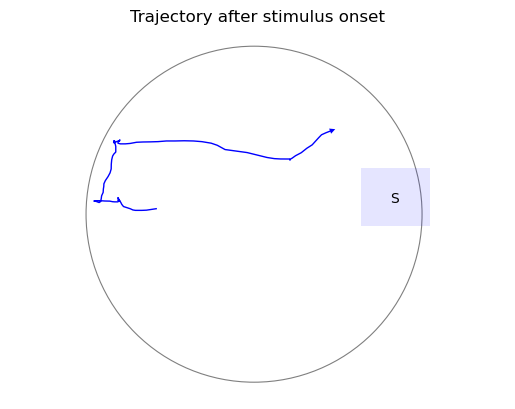

In [13]:
trajectory(shelter_x, shelter_y, x_diam, y_diam, dataframe_ranges(0, escape_done, coord_scaled))

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

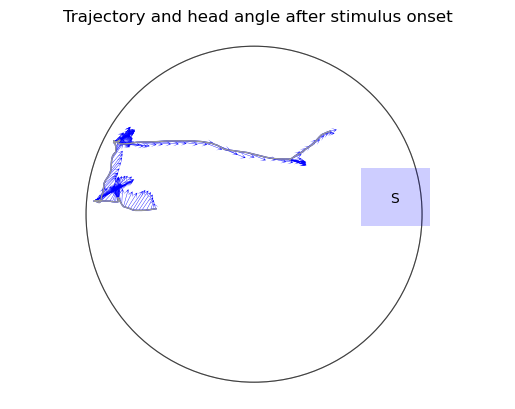

In [14]:
head_angle_trajectory_figure(shelter_x, shelter_y, x_diam, y_diam, dataframe_ranges(0, escape_done, coord_scaled))

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

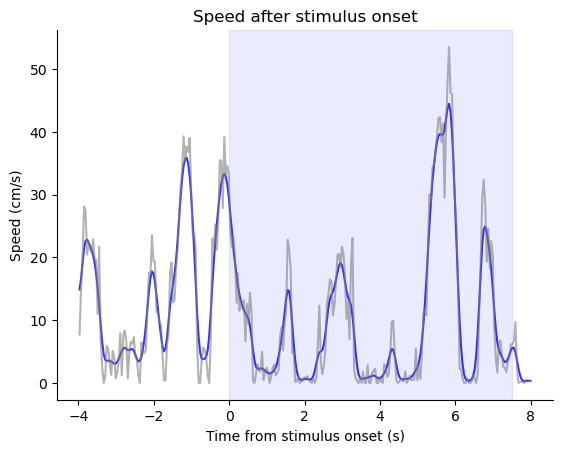

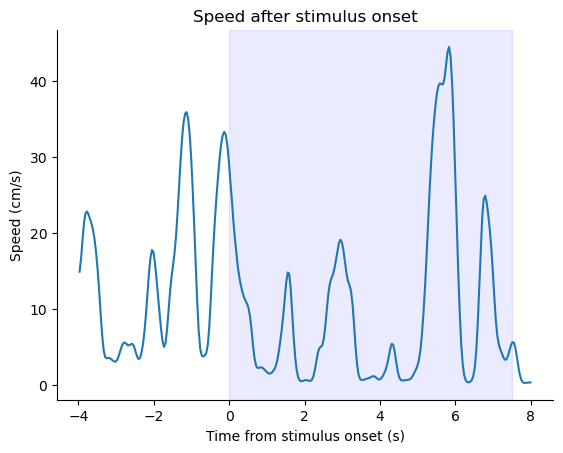

In [15]:
speed_figure(-4, 8, coord_scaled, False, True, sigma)
speed_figure(-4, 8, coord_scaled, True, False, sigma)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

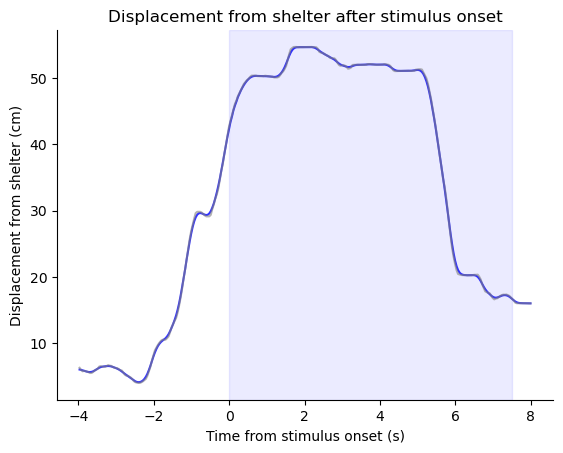

In [16]:
displacement_figure(-4, 8, coord_scaled, False, True, sigma) #interpolated NA values 

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

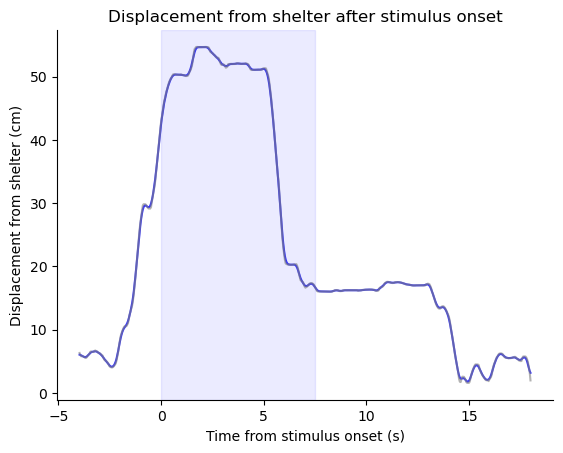

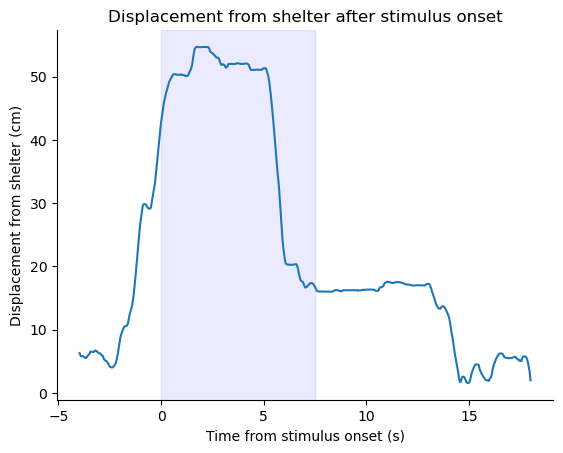

In [17]:
displacement_figure(-4, 18,coord_scaled, False, True, sigma)
displacement_figure(-4, 18,coord_scaled, False, False, sigma)


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

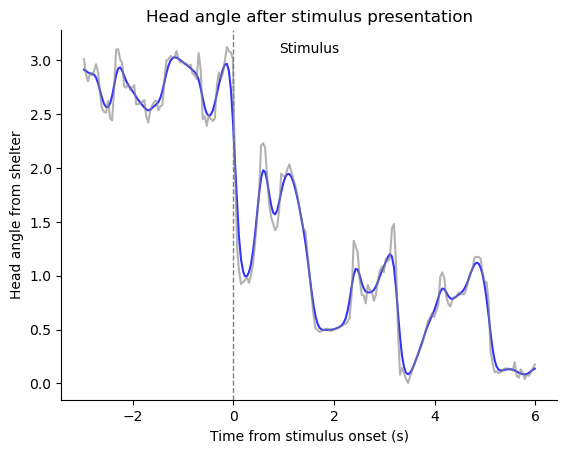

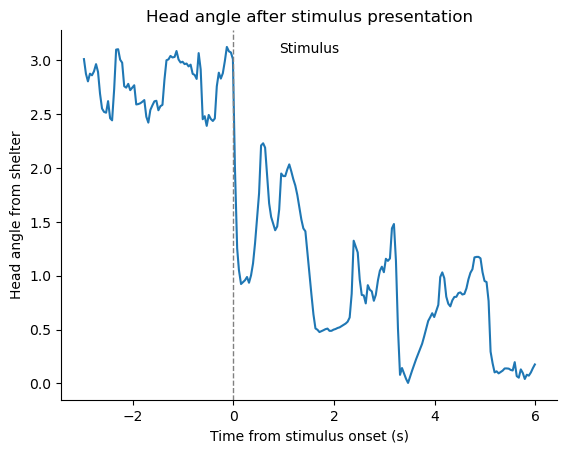

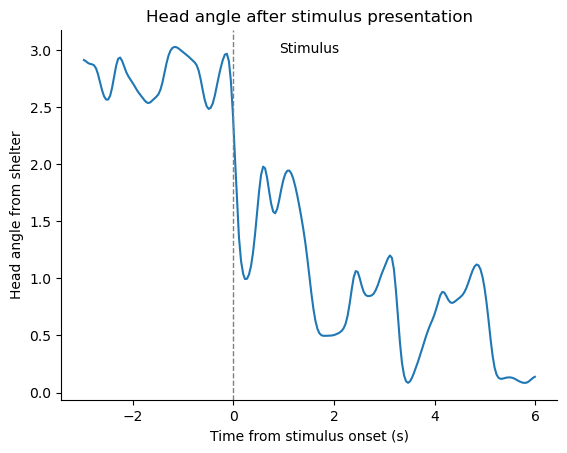

In [18]:
head_angle_figure(-3, 6,coord_scaled, False, True, sigma)
head_angle_figure(-3, 6,coord_scaled, False, False, sigma)
head_angle_figure(-3, 6,coord_scaled, True, True, sigma)


In [19]:
ratio, initial_displacement, total_distance = linearity_ratio(0, escape_done, coord_scaled)

In [20]:
#shelter_rotation(shelter_x, shelter_y, escape_only)

In [21]:
likelihood_data, likelihood_minus_nose, likelihood_center = likelihood_check(0, 8, .9, coords)

In [22]:
likelihood_data #need to adjust time frame to be useful 

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
6698,6698,6698,NaN,NaN,0.854517,-21.070911,1.380843,0.999999,-21.130255,0.407328,...,1.000000,-14.321884,1.301636,0.999999,0.029299,43.505370,23.980551,0.954306,NaN,NaN
6699,6699,6699,NaN,NaN,0.322730,-22.017806,1.261440,0.999994,-22.168065,0.358239,...,1.000000,-15.234449,1.044774,1.000000,0.074035,44.468063,21.630524,0.967663,NaN,NaN
6700,6700,6700,NaN,NaN,0.691531,-22.812003,1.261440,0.999999,-22.949643,0.358239,...,0.999999,-16.202170,0.883004,0.999999,0.109273,45.287987,23.366300,0.823382,NaN,NaN
6701,6701,6701,NaN,NaN,0.135725,-23.653140,1.261440,0.999997,-23.790444,0.358239,...,0.999999,-16.932532,0.883004,0.999999,0.151142,46.132423,20.170000,0.844498,NaN,NaN
6702,6702,6702,NaN,NaN,0.112685,-24.202244,1.320654,0.999998,-24.412408,0.449433,...,1.000000,-17.656055,0.883004,1.000000,0.194675,46.686513,12.745923,0.554868,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6871,6871,6871,NaN,NaN,0.802102,15.442656,16.764374,0.999853,14.840944,17.410171,...,0.999995,10.288676,13.102055,0.999987,6.951040,17.165586,22.603435,0.895752,NaN,NaN
6872,6872,6872,NaN,NaN,0.857640,15.974054,16.764374,0.999957,15.378693,17.410171,...,0.999968,11.149920,13.246114,0.999954,6.990784,16.828517,20.139273,0.800415,NaN,NaN
6889,6889,6889,NaN,NaN,0.841016,15.992419,12.902767,0.999950,16.489263,13.386280,...,0.999877,11.445741,15.478011,0.999846,7.672140,16.039985,0.000000,0.000000,NaN,NaN
6890,6890,6890,NaN,NaN,0.777289,15.735266,12.756701,0.999873,16.398449,13.110808,...,0.999888,11.453193,15.519695,0.999781,7.711065,16.043723,0.139726,0.005439,NaN,NaN


In [23]:

rotate, shelter_rotate_x, shelter_rotate_y = align_shelter(shelter_x, shelter_y, 0, escape_done, coord_scaled)
#normalized_df, shelter_normalized_x, shelter_normalized_y, combined_range = normalize_rotation(rotate, shelter_rotate_x, shelter_rotate_y)


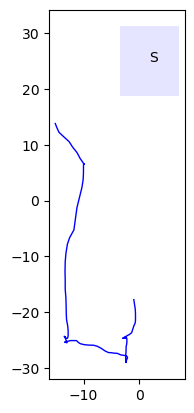

In [24]:

fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
    #make x and y scales equal - present as a circle


    #plot the center x and y coordinates
x = rotate['rotated_x']
y = rotate['rotated_y']

ax.text(shelter_rotate_x,shelter_rotate_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_rotate_x - 5.25), (shelter_rotate_y-6.25)), 10.5,12.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)


In [25]:

coord_scaled_smooth = smooth_curve(sigma, coord_scaled)
